In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## IMPORTING ALL THE REQUIRED MODULES

In [0]:
from keras.preprocessing import image
import cv2
import pandas as pd
from keras.preprocessing.image import load_img
import glob 
import sys
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils.np_utils import to_categorical
import pickle
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
import keras
from keras.initializers import he_normal
from matplotlib import pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
import pickle

## IMAGE PRE-PROCESSING

In [0]:
def image_preproc(path,cat,count):
    img_data=pd.DataFrame(columns=["image","class"])
    for im in glob.glob(path+'/*.*'):
      im = load_img(im)
      conv_img = image.img_to_array(im,data_format="channels_last"); #keeping the color-channel at the end in the representation of image vector 
      conv_img = cv2.resize(conv_img,(64,64)) ##resizing the image into the dimensions of 64x64
      try:
          conv_img= conv_img[:, :, :3] ## making all the channels to RGB if any another channel with !=3 magnitude is present
      except:
          conv_img= cv2.cvtColor(conv_img,cv2.COLOR_GRAY2RGB) #converting the grey scale images into RGB which have no channel value
      conv_img = conv_img/255 # performing the min-max normalization
      img_data.loc[count]=[conv_img,cat]
      count=count+1
    return img_data

## CALLING "image_preproc" FOR DIFFERENT CLASSES OF IMAGES

In [0]:
classc0 = image_preproc("/content/drive/My Drive/DS-ML_Buddies/train/c0",0,0)

In [0]:
classc0.shape

In [0]:
classc1 = image_preproc("/content/drive/My Drive/DS-ML_Buddies/train/c1",1,len(classc0['image']))

In [0]:
classc1.shape

In [0]:
classc2 = image_preproc("/content/drive/My Drive/DS-ML_Buddies/train/c2",2,len(classc1['image']))

In [0]:
classc2.shape

In [0]:
classc3 = image_preproc("/content/drive/My Drive/DS-ML_Buddies/train/c3",3,len(classc2['image']))

In [0]:
classc3.shape

In [0]:
classc4 = image_preproc("/content/drive/My Drive/DS-ML_Buddies/train/c4",4,len(classc3['image']))

In [0]:
classc4.shape

In [0]:
classc5 = image_preproc("/content/drive/My Drive/DS-ML_Buddies/train/c5",5,len(classc4['image']))

In [0]:
classc5.shape

In [0]:
classc6 = image_preproc("/content/drive/My Drive/DS-ML_Buddies/train/c6",6,len(classc5['image']))

In [0]:
classc6.shape

In [0]:
classc7 = image_preproc("/content/drive/My Drive/DS-ML_Buddies/train/c7",7,len(classc6['image']))

In [0]:
classc7.shape

In [0]:
classc8 = image_preproc("/content/drive/My Drive/DS-ML_Buddies/train/c8",8,len(classc7['image']))

In [0]:
classc8.shape

In [0]:
classc9 = image_preproc("/content/drive/My Drive/DS-ML_Buddies/train/c9",9,len(classc8['image']))

In [0]:
classc9.shape

## CONCATENATING ALL THE CLASSES DATAFRAME INTO A SINGLE DATAFRAME

In [0]:
total_data = classc0.append(classc1,ignore_index=True)
total_data = total_data.append(classc2,ignore_index=True)
total_data = total_data.append(classc3,ignore_index=True)
total_data = total_data.append(classc4,ignore_index=True)
total_data = total_data.append(classc5,ignore_index=True)
total_data = total_data.append(classc6,ignore_index=True)
total_data = total_data.append(classc7,ignore_index=True)
total_data = total_data.append(classc8,ignore_index=True)
total_data = total_data.append(classc9,ignore_index=True)
total_data.shape

(22433, 2)

## INDIVIDUAL COUNT OF CLASSES 
##C0 - Safe Driving  
##C1 - Texting - Right
##C2 - Talking on the Phone - Right
##C3 - Texting - Left
##C4 - Talking on the Phone - Left
##C5 - Operating the Radio 
##C6 - Drinking 
##C7 - Reaching Behind  
##C8 - Hair and Makeup
##C9 - Talking to Passenger

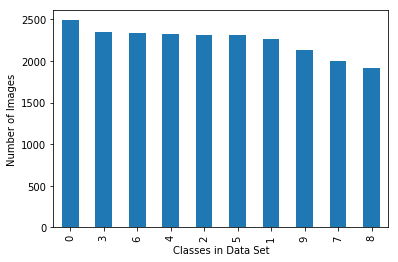

In [0]:
total_data['class'].value_counts().plot('bar')
plt.xlabel("Classes in Data Set")
plt.ylabel("Number of Images")
plt.show()

## SHUFFLING THE ROWS OF THE DATA

In [0]:
total_data = total_data.sample(frac=1).reset_index(drop=True) 
#frac returns part of random selction in the entire data,but here frac=1 so entire data will be considered
#ref:https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
total_data.head(10)

,image,class
0,"[[[0.052941177, 0.060784314, 0.04117647], [0.0...",7
1,"[[[0.115686275, 0.14901961, 0.1], [0.12696078,...",6
2,"[[[0.113235295, 0.1367647, 0.09166667], [0.104...",7
3,"[[[0.19215687, 0.2784314, 0.23137255], [0.1901...",4
4,"[[[0.04509804, 0.04901961, 0.029411765], [0.05...",5
5,"[[[0.08676471, 0.11029412, 0.055392157], [0.08...",3
6,"[[[0.1377451, 0.18872549, 0.1495098], [0.12941...",5
7,"[[[0.20588236, 0.27254903, 0.23333333], [0.180...",9
8,"[[[0.13137256, 0.16666667, 0.14705883], [0.139...",5
9,"[[[0.05490196, 0.05882353, 0.039215688], [0.05...",9


## SPLITTING THE DATA INTO TRAIN, CV AND TEST



In [0]:
x_train, x_CV, y_train, y_CV = train_test_split(total_data['image'],total_data['class'],train_size=0.80,shuffle=True)

x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,train_size=0.80,shuffle=True)

print("x_train::",x_train.shape)
print("x_cv::",x_CV.shape)
print("x_test::",x_test.shape)
print("y_train::",y_train.shape)
print("y_cv::",y_CV.shape)
print("y_test::",y_test.shape)

x_train:: (14356,)
x_cv:: (4487,)
x_test:: (3590,)
y_train:: (14356,)
y_cv:: (4487,)
y_test:: (3590,)


## HISTOGRAM ON COUNT OF INDIVIDUAL CLASSES IN THE TRAINING SET

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


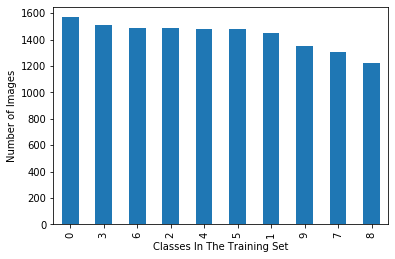

In [0]:
y_train.value_counts().plot('bar')
plt.xlabel("Classes In The Training Set")
plt.ylabel("Number of Images")
plt.show()

## HISTOGRAM ON COUNT OF INDIVIDUAL CLASSES IN THE CV SET

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


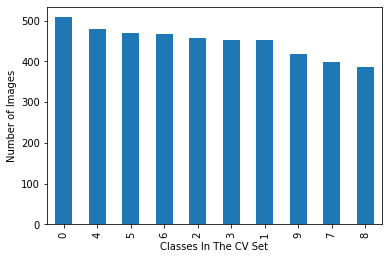

In [0]:
y_CV.value_counts().plot('bar')
plt.xlabel("Classes In The CV Set")
plt.ylabel("Number of Images")
plt.show()

## HISTOGRAM ON COUNT OF INDIVIDUAL CLASSES IN THE TEST SET

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


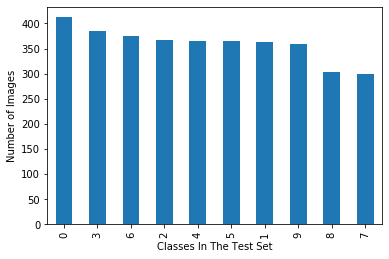

In [0]:
y_test.value_counts().plot('bar')
plt.xlabel("Classes In The Test Set")
plt.ylabel("Number of Images")
plt.show()

## CONVERTING THE CLASS LABELS INTO BINARY MATRICES (ONE HOT ENCODING)

In [0]:
y_train = to_categorical(y_train)
y_CV = to_categorical(y_CV)
y_test = to_categorical(y_test)
print("y_train shape::",y_train.shape)
print("y_CV shape::",y_CV.shape)
print("y_test shape::",y_test.shape)

y_train shape:: (14356, 10)
y_CV shape:: (4487, 10)
y_test shape:: (3590, 10)


## FLATTENING THE X-VECTORS OF TRAIN,CV,TEST FOR COMPATABILTY WITH THE MODEL

In [0]:
l=[]
z=np.array(x_train)
for i in range(len(z)):
  l.append(z[i].flatten())
x_train = np.array(l)
print("x_train shape::",x_train.shape)

l1=[]
z1=np.array(x_CV)
for i in range(len(z1)):
  l1.append(z1[i].flatten())
x_CV = np.array(l1)
print("x_CV shape::",x_CV.shape)

l2=[]
z2=np.array(x_test)
for i in range(len(z2)):
  l2.append(z2[i].flatten())
x_test = np.array(l2)
print("x_test shape::",x_test.shape)

x_train shape:: (14356, 12288)
x_CV shape:: (4487, 12288)
x_test shape:: (3590, 12288)


# **BUILDING THE MULTI-LAYER PERCEPTRON MODEL**

## **HYPER PARAMETER TUNING USING RANDOM SEARCH CV**

In [0]:
'''
#ref:https://keras.io/examples/mnist_mlp/
def run_mlp(neurons,epochs_,dropout,optimizer_,activation_):
  mlp = Sequential()## defining a sequential model
  mlp.add(BatchNormalization())
  mlp.add(Dense(neurons, activation=activation_,input_shape=(12288,),kernel_initializer='he_normal'))
  mlp.add(Dropout(dropout))
  mlp.add(BatchNormalization())
  mlp.add(Dense(10, activation='softmax'))
  mlp.compile(loss='categorical_crossentropy',optimizer=optimizer_,metrics=['accuracy']) 
  values = mlp.fit(x_train,y_train,batch_size=256,epochs=epochs_,validation_data=(x_CV,y_CV))
  return mlp
'''

In [0]:
'''
random_mod = KerasClassifier(build_fn=run_mlp,batch_size=1000)
#"build_fn" takes the callable function;"batch_size" is for number of i/ps to be taken at a time..
# define the Random search parameters
hyper_parameters = {'epochs_':[20,30,40],'neurons':[25,50,75,100,125],'dropout':[0.1,0.2,0.3,0.4,0.5],'optimizer_':['Adagrad','Adadelta','Adam'],'activation_':['sigmoid','relu']}
Rand_param = RandomizedSearchCV(estimator=random_mod, param_distributions=hyper_parameters)
values_rand = Rand_param.fit(x_train,y_train)
values_rand.best_params_
'''

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train on 14356 samples, validate on 4487 samples
Epoch 1/20
14356/14356 [==============================] - 37s 3ms/step - loss: 1.2705 - acc: 0.6135 - val_loss: 0.7224 - val_acc: 0.8034
Epoch 2/20
14356/14356 [==============================] - 2s 115us/step - loss: 0.4172 - acc: 0.9011 - val_loss: 0.2609 - val_acc: 0.9523
Epoch 3/20
14356/14356 [==============================] - 2s 115us/step - loss: 0.2022 - acc: 0.9626 - val_loss: 0.2191 - val_acc: 0.9516
Epoch 4/20
14356/14356 [==============================] - 2s 117us/step - loss: 0.1374 - acc: 0.9749 - val_loss: 0.2465 - val_acc: 0.9231
Epoch 5/20
14356/14356 [==============================] - 2s 116us/step - loss: 0.1023 - acc: 0.9830 - val_loss: 0.0715 - val_acc: 0.9860
Epoch 6/20
14356/14356 [==============================] - 2s 117us/step - loss: 0.0636 - acc: 0.9921 - val_loss: 0.1314 - val_acc: 0.9728
Epoch 7/20
14356/14356 [==============================] - 2s 116us/step - loss: 0.0673 - acc: 0.9907 - val_loss: 0.0923 - va

{'activation_': 'relu',
 'dropout': 0.1,
 'epochs_': 20,
 'neurons': 50,
 'optimizer_': 'Adagrad'}

## **THE OPTIMAL PARAMETERS FINALLY OBTAINED USING RANDOM SEARCH CV**

In [0]:
opt_optimzer = 'Adagrad'
opt_epochs = 20
opt_activation = 'relu'
opt_neurons = 50
opt_dropout = 0.1

## **BUILDING MULTI LAYER PERCEPTRON ARCHITECTURE ACCORDING TO THE OBTAINED OPTIMAL PARAMETER VALUES**

In [0]:
opt_optimzer = 'Adagrad'
opt_epochs = 20
opt_activation = 'relu'
opt_neurons = 50
opt_dropout = 0.1
#ref:https://keras.io/examples/mnist_mlp/
mlp = Sequential()## defining a sequential model
mlp.add(BatchNormalization())
mlp.add(Dense(opt_neurons, activation=opt_activation,input_shape=(12288,),kernel_initializer='he_normal')) 
## Declaring a dense layer of optimal number of neurons with "relu" activation(optimal activation unit) 
## and size of input image is 64x64x3 = 12288
mlp.add(Dropout(opt_dropout)) 
# Introducing the dropout with optimal dropout value to avoid overfitting
mlp.add(BatchNormalization()) 
#We are normalizing the data before we give to the activation unit
mlp.add(Dense(10, activation='softmax')) 
#using the softmax classifier to predict the probabailities of each class
mlp.compile(loss='categorical_crossentropy',optimizer=opt_optimzer,metrics=['accuracy']) 
#compiling the model entropy-loss and using "adagrad" optimizer(OPTIMAL OPTIMZER) with "accuracy metric" 
values = mlp.fit(x_train,y_train,batch_size=256,epochs=opt_epochs,validation_data=(x_CV,y_CV))
score = mlp.evaluate(x_test, y_test)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 14356 samples, validate on 4487 samples
Epoch 1/20





14356/14356 [==============================] - 6s 436us/step - loss: 0.9390 - acc: 0.7362 - val_loss: 0.7190 - val_acc: 0.8157
Epoch 2/20
14356/14356 [==============================] - 1s 74us/step - loss: 0.2106 - acc: 0.9650 - val_loss: 0.2540 - val_acc: 0.9719
Epoch 3/20
14356/14356 [==============================] - 1s 75us/step - loss: 0.0970 - acc: 0.9897 - val_loss: 0.4399 - val_acc: 0.8897
Epoch 4/20
14356/14356 [==============================] - 1s 75us/step - loss: 0.0778 - acc: 0.9905 - val_loss: 0.1242 - val_acc: 0.9842
Epoch 5/20
14356/14356 [==============================] - 1s 78us/step - loss: 0.0454 - acc: 0.9969 - val_loss: 0.2628 - val_acc: 0.9236
Epoch 6/20
14356/14356 [==================

## **PLOT OF EPOCHS V/S ACCURACY OF TRAIN AND CV CLEARLY INDICATES NO OVERFITTING**

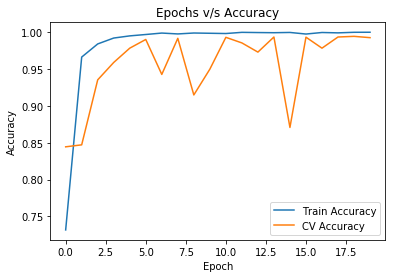

In [0]:
plt.plot(values.history['acc'])
plt.plot(values.history['val_acc'])
plt.title('Epochs v/s Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'CV Accuracy'])
plt.show()

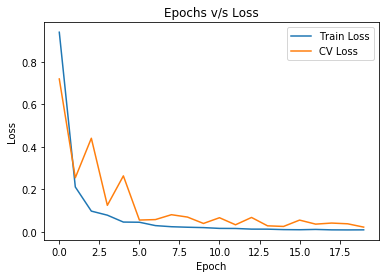

In [0]:
plt.plot(values.history['loss'])
plt.plot(values.history['val_loss'])
plt.title('Epochs v/s Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'CV Loss'])
plt.show()

## **FINAL TEST LOSS AND TEST ACCURACY**

In [0]:
print('TEST LOSS::', score[0])
print('TEST ACCURACY::', score[1]*100,"%")

TEST LOSS:: 0.02404249551755306
TEST ACCURACY:: 98.4150417827298 %
